In [1]:
import pandas as pd
import os
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
DATA_DIR = os.path.join(BASE_DIR, 'feature_eng', 'data', 'ft_df.csv')
MODEL_DIR = os.path.join(BASE_DIR, 'heroku', 'models')

In [3]:
df = pd.read_csv(DATA_DIR)

In [4]:
df.head()

,season,date,match_name,home_team,away_team,winner,home_score,away_score,h_odd,d_odd,...,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
0,2020,2021-05-23,Arsenal - Brighton,Arsenal,Brighton,HOME_TEAM,2,0,1.68,4.22,...,44,13.333333,1.541537,9,14,14,1,0,0,AWAY_TEAM
1,2020,2021-05-23,Aston Villa - Chelsea,Aston Villa,Chelsea,HOME_TEAM,2,1,6.99,4.92,...,34,14.666667,0.902502,19,10,8,1,0,0,DRAW
2,2020,2021-05-23,Fulham - Newcastle,Fulham,Newcastle,AWAY_TEAM,0,2,2.49,3.48,...,62,17.000000,1.460800,11,9,17,1,0,0,DRAW
3,2020,2021-05-23,Leeds - West Brom,Leeds,West Brom,HOME_TEAM,3,1,1.55,4.78,...,73,19.333333,2.557325,5,11,21,0,3,0,AWAY_TEAM
4,2020,2021-05-23,Leicester - Tottenham,Leicester,Tottenham,AWAY_TEAM,2,4,1.80,4.26,...,43,16.333333,1.471424,17,8,12,0,1,0,AWAY_TEAM


# Understanding all features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6077 entries, 0 to 6076
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              6077 non-null   int64  
 1   date                6077 non-null   object 
 2   match_name          6077 non-null   object 
 3   home_team           6077 non-null   object 
 4   away_team           6077 non-null   object 
 5   winner              6077 non-null   object 
 6   home_score          6077 non-null   int64  
 7   away_score          6077 non-null   int64  
 8   h_odd               6077 non-null   float64
 9   d_odd               6077 non-null   float64
 10  a_odd               6077 non-null   float64
 11  h_match_points      6077 non-null   int64  
 12  a_match_points      6077 non-null   int64  
 13  ht_rank             6077 non-null   int64  
 14  ht_ls_rank          4842 non-null   float64
 15  ht_days_ls_match    5917 non-null   float64
 16  ht_poi

In [6]:
df.describe().round(2)

,season,home_score,away_score,h_odd,d_odd,a_odd,h_match_points,a_match_points,ht_rank,ht_ls_rank,...,at_l_wavg_goals,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak
count,6077.00,6077.00,6077.00,6077.00,6077.00,6077.00,6077.00,6077.00,6077.00,4842.0,...,6077.00,6077.00,6077.00,6077.00,6077.00,6077.00,6077.00,6077.00,6077.00,6077.00
mean,2012.50,1.53,1.16,2.81,3.97,4.83,1.62,1.13,10.50,9.0,...,1.35,24.67,7.22,1.25,6.98,4.62,6.89,0.77,0.55,0.31
std,4.61,1.31,1.15,2.08,1.27,4.10,1.32,1.27,5.77,4.9,...,0.84,16.60,4.53,0.76,5.50,3.34,5.35,1.37,1.04,0.63
min,2005.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2009.00,1.00,0.00,1.65,3.28,2.38,0.00,0.00,6.00,5.0,...,0.75,11.00,3.33,0.70,3.00,2.00,2.00,0.00,0.00,0.00
50%,2013.00,1.00,1.00,2.17,3.51,3.45,1.00,1.00,11.00,9.0,...,1.24,23.00,7.00,1.16,6.00,4.00,6.00,0.00,0.00,0.00
75%,2017.00,2.00,2.00,3.04,4.18,5.50,3.00,3.00,15.00,13.0,...,1.85,36.00,10.67,1.72,10.00,7.00,10.00,1.00,1.00,0.00
max,2020.00,9.00,9.00,37.95,19.78,41.78,3.00,3.00,20.00,17.0,...,6.00,82.00,20.67,6.00,31.00,17.00,28.00,18.00,10.00,5.00


In [7]:
#checking class proportions
class_p = (df.winner.value_counts(normalize = True) *100).round(2).reset_index()
class_p.columns = ['winner', '%']
class_p

,winner,%
0,HOME_TEAM,46.03
1,AWAY_TEAM,29.55
2,DRAW,24.42


In [8]:
#checking class proportions
class_p = (df.ls_winner.value_counts(normalize = True) *100).round(2).reset_index()
class_p.columns = ['winner', '%']
class_p

,winner,%
0,HOME_TEAM,46.24
1,AWAY_TEAM,29.21
2,DRAW,24.55


We can see that most of the times the home team wins, which is common knowledge in the soccer community. 

Also we have more than 70% of the dataframe containing winning data, that's one of the reasons why it's going to be difficult to predict draws.

In [9]:
df['date'] = pd.to_datetime(df.date)

num_cols = df.dtypes[df.dtypes != 'object'].index.tolist()

In [10]:
#creating dummy dependent variables and set of columns to check their correlation with the dependent variables

cols_to_drop = ['season', 'match_name','date', 'home_team', 'away_team', 'home_score', 'away_score',
                'h_match_points', 'a_match_points']

corr_cols = list(set(num_cols) - set(cols_to_drop))

df['winner_h'] = np.where(df.winner == 'HOME_TEAM', 1, 0)
df['winner_a'] = np.where(df.winner == 'AWAY_TEAM', 1, 0)
df['winner_d'] = np.where(df.winner == 'DRAW', 1, 0)

In [11]:
df[corr_cols + ['winner_h']].corr()['winner_h'].sort_values(ascending = False).reset_index()

,index,winner_h
0,winner_h,1.000000
1,a_odd,0.336843
2,at_rank,0.292159
3,at_ls_rank,0.201942
4,d_odd,0.189922
5,ht_wins,0.166122
6,ht_points,0.150310
7,ht_l_goals,0.146948
8,ht_goals,0.146948
9,at_losses,0.144198


In [12]:
df[corr_cols + ['winner_a']].corr()['winner_a'].sort_values(ascending = False).reset_index()

,index,winner_a
0,winner_a,1.000000
1,h_odd,0.352757
2,ht_rank,0.283738
3,ht_ls_rank,0.220860
4,at_wins,0.134243
5,at_win_streak,0.133123
6,at_l_wavg_points,0.119807
7,at_l_wavg_goals,0.116789
8,ht_losses,0.114680
9,at_points,0.113685


In [13]:
df[corr_cols + ['winner_d']].corr()['winner_d'].sort_values(ascending = False).reset_index()

,index,winner_d
0,winner_d,1.000000
1,ht_rank,0.070664
2,ht_ls_rank,0.065241
3,ht_l_wavg_goals_sf,0.030839
4,ht_loss_streak,0.026867
5,at_l_wavg_goals,0.024809
6,at_l_points,0.023051
7,at_l_wavg_points,0.022907
8,at_ls_rank,0.020359
9,ht_days_ls_match,0.016392


By checking these correlation dataframes we can see that when one of the two teams wins, the features that seem to have the highest correlation are those that say how the teams are ranked in the current and last season and the teams odds.

We can also see that the weighted exponential average also has a higher correlation to the dependent variables than the regular metrics.

We can observe that there isn't much correlation of the variables to the draw outcome. Which means that we'll probably have a hard time trying to predict the draw outcome.

# Understanding RFE features

#### Here we'll use the selected features in the modeling phase, chosen through RFE method, and try and understand them better.

In [14]:
model = pickle.load(open(os.path.join(MODEL_DIR, "lr_model.pkl"), 'rb'))

In [15]:
model['features']

['h_odd',
 'd_odd',
 'a_odd',
 'ht_rank',
 'ht_l_points',
 'at_rank',
 'at_l_points',
 'at_l_wavg_points',
 'at_l_wavg_goals',
 'at_l_wavg_goals_sf',
 'at_win_streak',
 'ls_winner_-33',
 'ls_winner_HOME_TEAM']

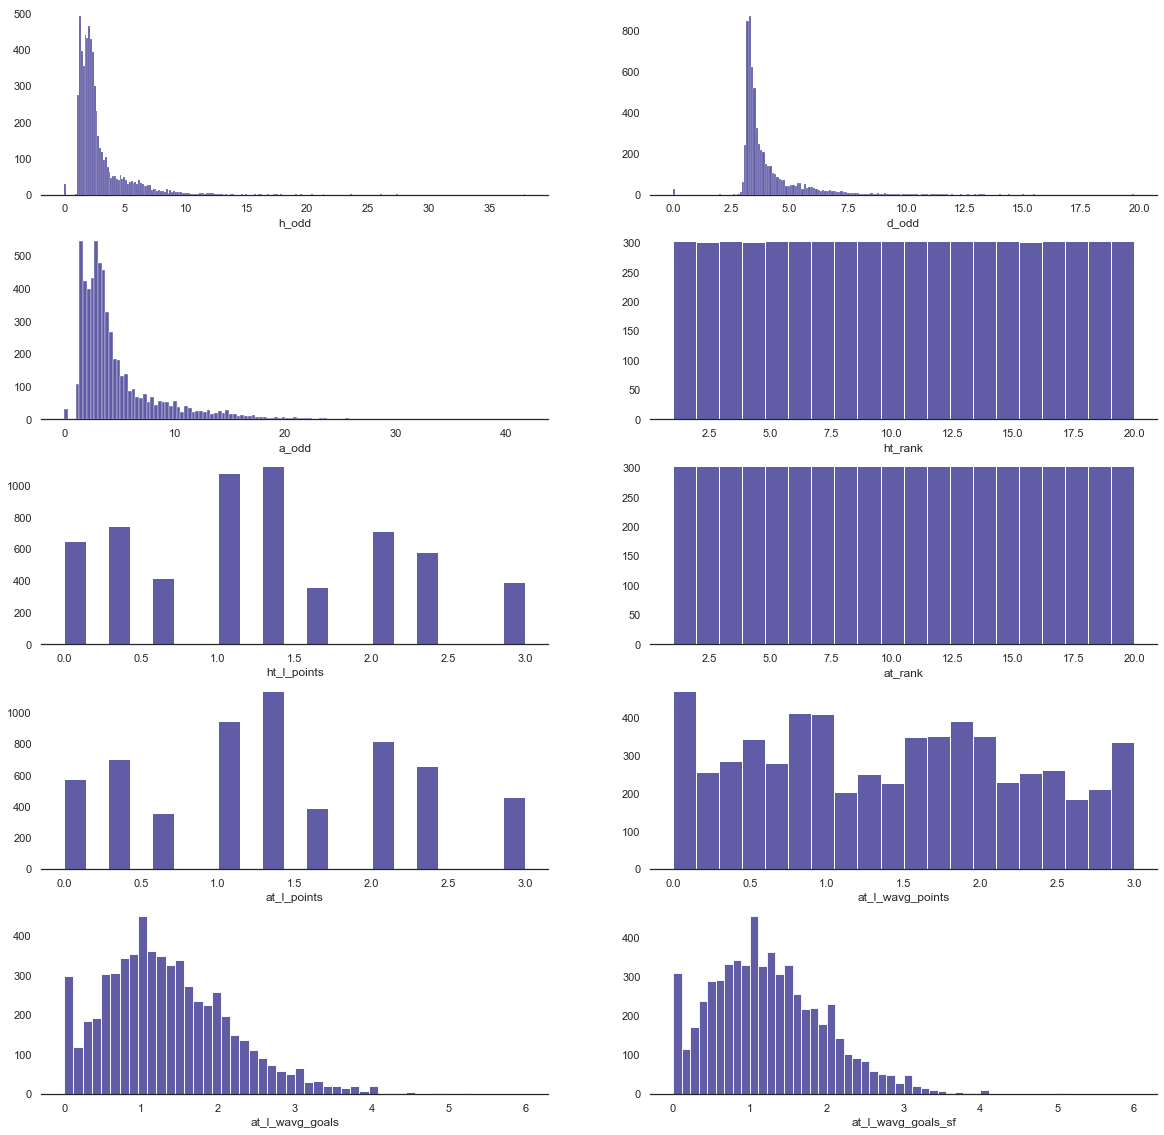

In [16]:
color = sns.color_palette("CMRmap")

sns.set(rc={'figure.figsize':(20,20)}, palette = color, style = 'white')


for i, column in enumerate(model['features'], 1):
    try:
        plt.subplot(5,2,i)
        sns.histplot(df[column]).set(ylabel = None)
        sns.despine(left=True)
    except:
        pass

In the histograms shown above we can see that the features aren't normally distributed and are also in different scales, that's why we applied the MinMaxScaler transformation in the modeling phase.

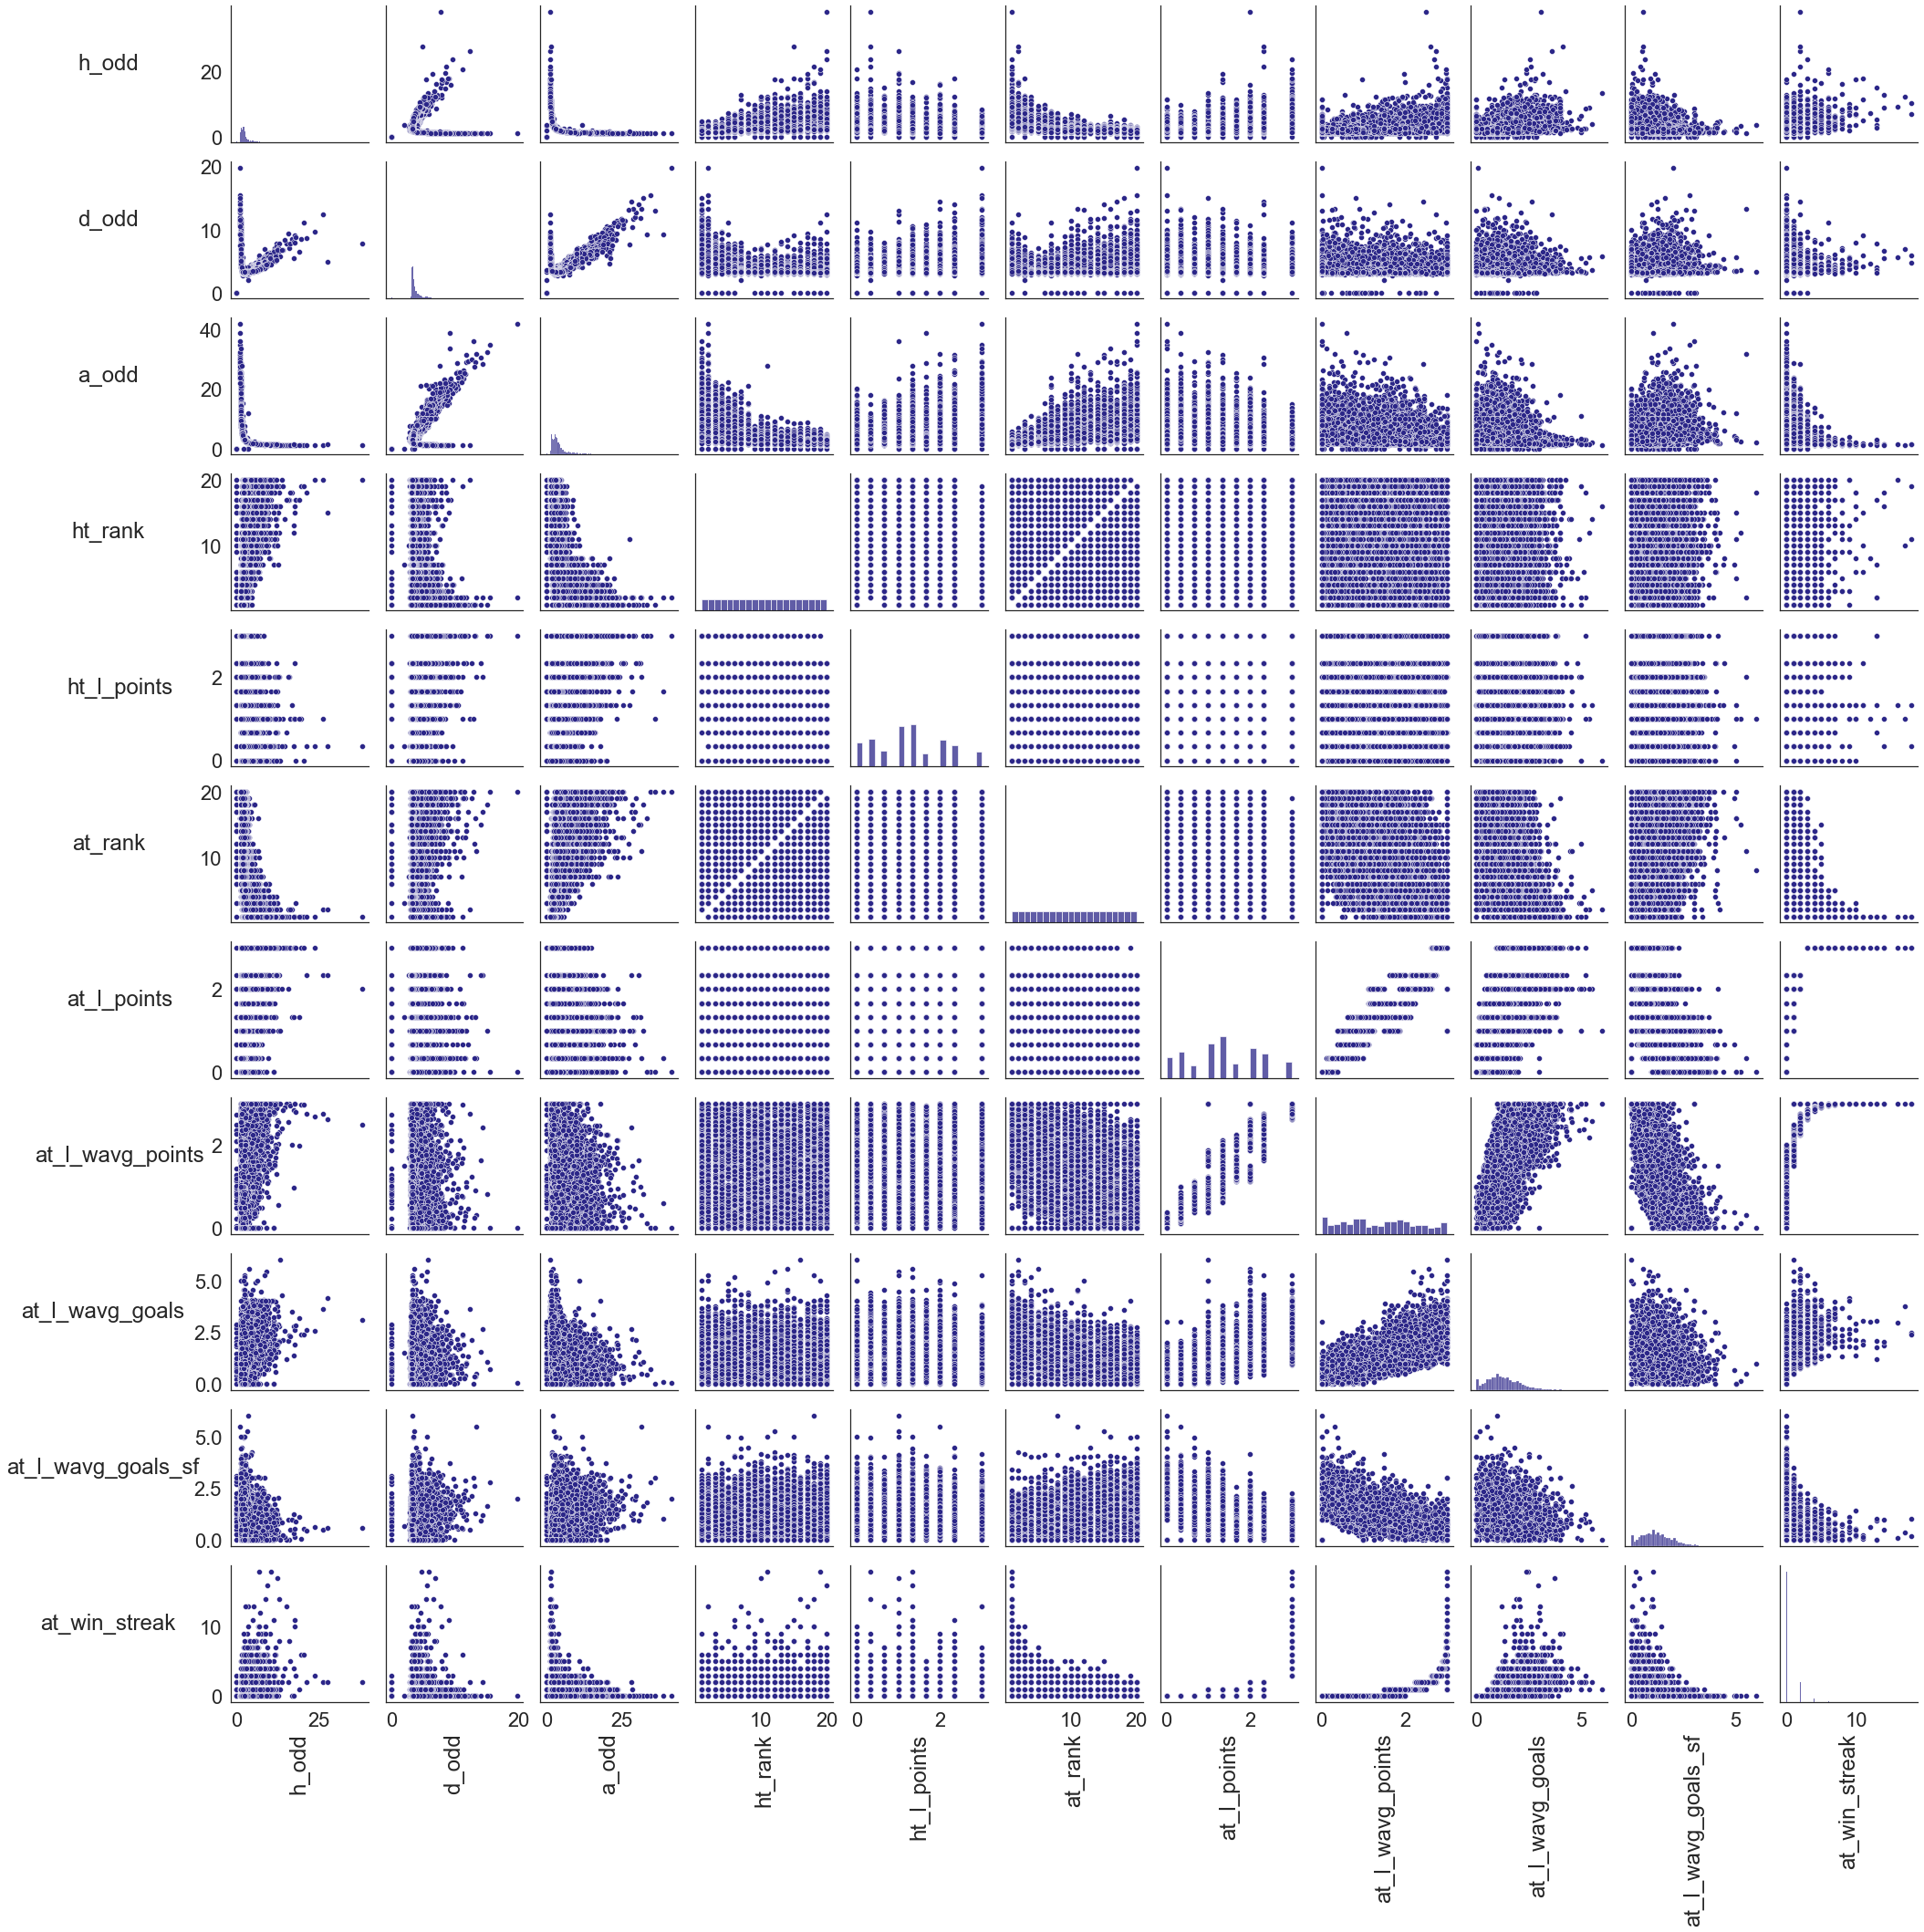

In [17]:
color = sns.color_palette("CMRmap")

sns.set(palette = color, style = 'white', font_scale = 2)

g = sns.pairplot(df[['h_odd',
 'd_odd',
 'a_odd',
 'ht_rank',
 'ht_l_points',
 'at_rank',
 'at_l_points',
 'at_l_wavg_points',
 'at_l_wavg_goals',
 'at_l_wavg_goals_sf',
 'at_win_streak']])



for ax in g.axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.labelpad = 100    

In this pairplot we can observe some linearities:
- The w.e.a. points has a positive correlation with the w.e.a. goals metric and a negative correlation with the  w.e.a. goals suffered metric, which makes perfect sense. If a teams makes more points it's going to score more goals and suffer less goals.

- The home team odd goes up as the  w.e.a. points and goals of the away team also goes up. Which means that the more the away team scores, the less the chance of the home team wins.

- The draw odd is also sort of correlated to the both teams odd, probably because every game is gonna have a team with a higher odd, and the draw odd tends to be near the higher odd.

- We can also see some obvious linearities, like the home team odd going down as the away team rank goes up. Which means that the lowest the away team's position in the table, the higher the chance of the home team winning.